In [77]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.core.fromnumeric import reshape
import pandas as pd
import datetime
import time
from sklearn import preprocessing
#Row-column value for csv file
ROWCOUNT = 8267068#35893#283#3872#8267068
COLUMNCOUNT = 9

ROWCOUNT_test =7190

#read csv
datas      = pd.read_csv('EURUSD_M1.csv', header=1)
datas_test = pd.read_csv('EURUSD_M1_test.csv' , header=1)

#change value to list
datas      = datas.values.tolist()
datas_test = datas_test.values.tolist()

#Split all columns and rows and reshape
datas      = np.array([[i.split('\t') for i in k] for k in datas]).reshape(ROWCOUNT,COLUMNCOUNT)
datas_test = np.array([[i.split('\t') for i in k] for k in datas_test]).reshape(ROWCOUNT_test,COLUMNCOUNT)

#get readeable dataframe value from 'datas'
datas_df      = pd.DataFrame(datas,columns     = ['Date','Time','Open','High','Low','Close','Tickvol','Vol','Spread'])
datas_df_test = pd.DataFrame(datas_test,columns= ['Date','Time','Open','High','Low','Close','Tickvol','Vol','Spread'])
#datas_df['Date'] = pd.to_datetime(datas_df['Date'])
#print(datas_df['Date'][0].strftime("%A")," ",datas_df['Date'][0])

#String Date + Time value to timestamp value
#tmp=np.array([[(datas_df['Date'][i].strftime("%A"))] for i in range(ROWCOUNT)]).reshape(ROWCOUNT,1)
#tmp=np.array([[datetime.datetime.strptime((datas_df['Date'][i]),'%Y.%m.%d').timestamp()] for i in range(ROWCOUNT)]).reshape(ROWCOUNT,1)
tmp      =np.array([[datetime.datetime.strptime((datas_df['Date'][i]     +" "+datas_df['Time'][i])     ,'%Y.%m.%d %H:%M:%S').timestamp()] for i in range(ROWCOUNT)]).reshape(ROWCOUNT,1)
tmp_test =np.array([[datetime.datetime.strptime((datas_df_test['Date'][i]+" "+datas_df_test['Time'][i]),'%Y.%m.%d %H:%M:%S').timestamp()] for i in range(ROWCOUNT_test)]).reshape(ROWCOUNT_test,1)

date      = pd.DataFrame(tmp)
date_test = pd.DataFrame(tmp_test)

#Split values from datas_df to Arrays
for i in datas_df.columns:
    if i !='Date' :
        if i !='Time' :
            datas_df[i] = pd.to_numeric(datas_df[i])

datas_df = datas_df.drop(columns='Tickvol')
datas_df = datas_df.drop(columns='Vol')
datas_df = datas_df.drop(columns='Spread')
datas_df = datas_df.drop(columns='Date')
datas_df = datas_df.drop(columns='Time')

#close = datas_df[['Close']]
#open  = datas_df[['Open']]
#high  = datas_df[['High']]
#low   = datas_df[['Low']]

for i in datas_df_test.columns:
    if i !='Date' :
        if i !='Time' :
            datas_df_test[i] = pd.to_numeric(datas_df_test[i])

datas_df_test = datas_df_test.drop(columns='Tickvol')
datas_df_test = datas_df_test.drop(columns='Vol')
datas_df_test = datas_df_test.drop(columns='Spread')
datas_df_test = datas_df_test.drop(columns='Date')
datas_df_test = datas_df_test.drop(columns='Time')

#close_test = datas_df_test[['Close']]
#open_test  = datas_df_test[['Open']]
#high_test  = datas_df_test[['High']]
#low_test   = datas_df_test[['Low']]

#sec      = pd.concat([datas_df['Close']     ,datas_df['Open']     ,datas_df['High']     ,datas_df['Low']]     ,axis=1)
#sec_test = pd.concat([datas_df_test['Close'],datas_df_test['Open'],datas_df_test['High'],datas_df_test['Low']],axis=1)

sec = datas_df
sec_test = datas_df_test

In [78]:
from sklearn.model_selection import train_test_split

date,date_test     ,sec,sec_test      = train_test_split(date     ,sec     ,test_size=0.33   , random_state=0)
#a      ,x_test_test,b      ,y_test_test = train_test_split(date_test,sec_test,test_size=0.999   , random_state=0)

In [79]:

from sklearn.preprocessing import StandardScaler
sc1=StandardScaler()
#date        = sc1.fit_transform(date)
#sec         = sc1.fit_transform(sec)
#date_test   = sc1.fit_transform(date_test)
#sec_test    = sc1.fit_transform(sec_test)

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
#date = mms.fit_transform(date)
#sec = mms.transform(sec)
#date_test = mms.fit_transform(date_test)
#sec_test = mms.transform(sec_test)


In [80]:
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(date,sec)
predict     = ml.predict(date_test)

date        = np.array(pd.DataFrame((date)).sort_index())
sec         = np.array(pd.DataFrame((sec)).sort_index())

date_test   = np.array(pd.DataFrame((date_test)).sort_index())
predict     = np.array(pd.DataFrame((predict)).sort_index())

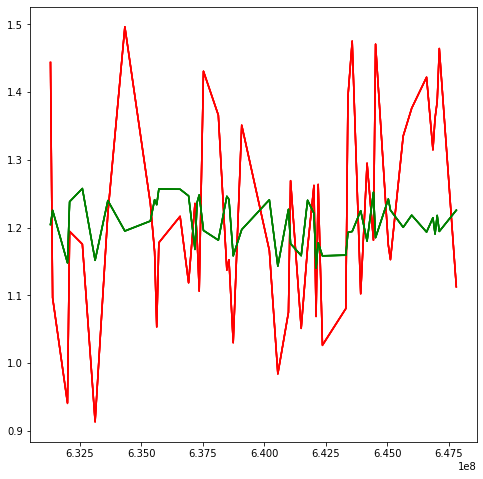

In [81]:
plt.figure(figsize=(8, 8))
plt.plot(date_test[:50]     ,sec_test[:50]    ,color='red')
plt.plot(date_test[:50]     ,predict[:50]     ,color='green')
plt.show()